## Convert Time Series Data to Supervised Problem 

In [ ]:
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
#https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [19]:
import data_prep_helper
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd

In [ ]:
corr_df = data_prep_helper.get_corr_df()

In [4]:
corr_df = corr_df.set_index("bitcoin_Date")

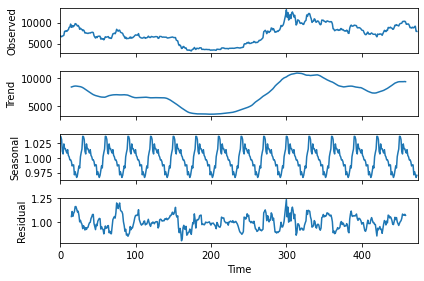

In [23]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
# Input dataframe df has prices under the column name 'close'

series = pd.DataFrame(data=corr_df['bitcoin_Price'][800:].values, index=pd.to_datetime(corr_df.index[800:]), columns = ['bitcoin_Price']).dropna()
result = seasonal_decompose(series.values, model='multiplicative', freq=30)
result.plot()
pyplot.show()

In [24]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(corr_df['bitcoin_Price'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.657399
p-value                           0.453185
#Lags Used                        3.000000
Number of Observations Used    1270.000000
Critical Value (1%)              -3.435510
Critical Value (5%)              -2.863818
Critical Value (10%)             -2.567983
dtype: float64


As the value of the test statistic < critical value at all confidence intervals, we reject the null hypothesis that the series has a unit root. --> is stationary

In [29]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(corr_df['bitcoin_Price'])

Results of KPSS Test:
Test Statistic            3.724092
p-value                   0.010000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


As the value of the test statistic > the critical value at all confidence intervals, we reject the null hypothesis that the series is stationary. --> isn't stationary

In [6]:
corr_values = corr_df.values

In [7]:
corr_values = corr_values.astype('float32')


TypeError: float() argument must be a string or a number, not 'Timestamp'